In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
img = cv2.imread("/content/nature.jpg", cv2.IMREAD_GRAYSCALE)

In [ ]:
if img is None:
    print("Error: Image not found. Please check the file name and path.")
else:
    print("Image loaded successfully!")


Image loaded successfully!


(np.float64(-0.5), np.float64(274.5), np.float64(182.5), np.float64(-0.5))

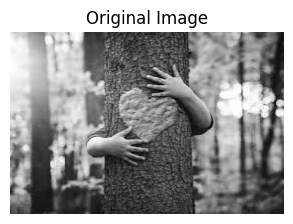

In [ ]:
plt.figure(figsize=(12,8))
plt.subplot(2,3,1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis("off")

/tmp/ipython-input-2697708402.py:2: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(img.ravel(), 256, [0,256])


Text(0.5, 1.0, 'Original Histogram')

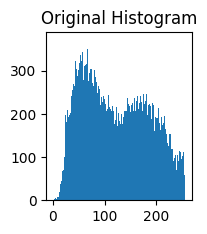

In [ ]:
plt.subplot(2,3,2)
plt.hist(img.ravel(), 256, [0,256])
plt.title("Original Histogram")


(np.float64(-0.5), np.float64(274.5), np.float64(182.5), np.float64(-0.5))

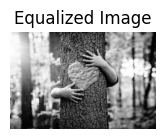

In [ ]:
img_eq = cv2.equalizeHist(img)

plt.subplot(2,3,3)
plt.imshow(img_eq, cmap='gray')
plt.title("Equalized Image")
plt.axis("off")

/tmp/ipython-input-2525650592.py:2: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(img_eq.ravel(), 256, [0,256])


Text(0.5, 1.0, 'Equalized Histogram')

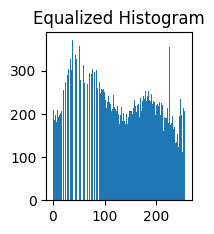

In [ ]:
plt.subplot(2,3,4)
plt.hist(img_eq.ravel(), 256, [0,256])
plt.title("Equalized Histogram")


In [ ]:
mean_filter = cv2.blur(img, (3,3))
median_filter = cv2.medianBlur(img, 3)
gaussian_filter = cv2.GaussianBlur(img, (3,3), 0)
laplacian_filter = cv2.Laplacian(img, cv2.CV_64F)


(np.float64(-0.5), np.float64(274.5), np.float64(182.5), np.float64(-0.5))

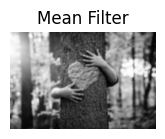

In [ ]:
plt.subplot(2,3,5)
plt.imshow(mean_filter, cmap='gray')
plt.title("Mean Filter")
plt.axis("off")


(np.float64(-0.5), np.float64(274.5), np.float64(182.5), np.float64(-0.5))

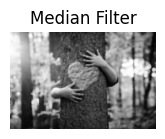

In [ ]:
plt.subplot(2,3,6)
plt.imshow(median_filter, cmap='gray')
plt.title("Median Filter")
plt.axis("off")

(np.float64(-0.5), np.float64(274.5), np.float64(182.5), np.float64(-0.5))

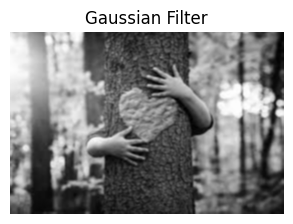

In [ ]:
plt.figure(figsize=(12,8))
plt.subplot(1,3,1)
plt.imshow(gaussian_filter, cmap='gray')
plt.title("Gaussian Filter")
plt.axis("off")


(np.float64(-0.5), np.float64(274.5), np.float64(182.5), np.float64(-0.5))

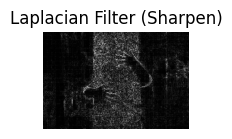

In [ ]:
plt.subplot(1,3,2)
plt.imshow(np.uint8(np.absolute(laplacian_filter)), cmap='gray')
plt.title("Laplacian Filter (Sharpen)")
plt.axis("off")

In [ ]:
dft = np.fft.fft2(img)
dft_shift = np.fft.fftshift(dft)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
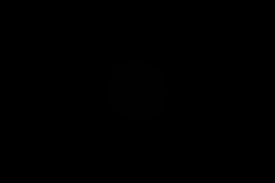

In [ ]:
rows, cols = img.shape
crow, ccol = rows//2 , cols//2
mask = np.zeros((rows, cols), np.uint8)
r = 30
cv2.circle(mask, (ccol,crow), r, 1, -1)



In [ ]:
low_pass = dft_shift * mask
low_img = np.fft.ifft2(np.fft.ifftshift(low_pass))
low_img = np.abs(low_img)

In [ ]:
high_pass = dft_shift * (1 - mask)
high_img = np.fft.ifft2(np.fft.ifftshift(high_pass))
high_img = np.abs(high_img)

(np.float64(-0.5), np.float64(274.5), np.float64(182.5), np.float64(-0.5))

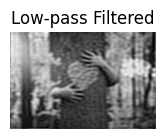

In [ ]:
plt.subplot(1,3,3)
plt.imshow(low_img, cmap='gray')
plt.title("Low-pass Filtered")
plt.axis("off")

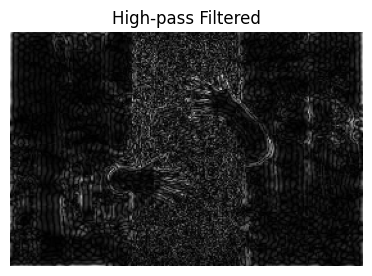

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(high_img, cmap='gray')
plt.title("High-pass Filtered")
plt.axis("off")

plt.show()